# <center>Tato studijní pomůcka vznikla za podpory Inovačního projektu FSv ČVUT č. 15 "Inovativní pomůcky pro předměty Přetváření a porušování materiálů".</center>
<center>(c) 2024 Lenka Dohnalová <i>(lenka.dohnalova@fsv.cvut.cz)</i>, Petr Havlásek <i>(petr.havlasek@cvut.cz)</i>, Milan Jirásek <i>(milan.jirasek@cvut.cz)</i></center>

***
# Plasticita - jednoosá napjatost - reologický model

## Zadání
  Na obrázku je reologický model složený ze dvou pružin  o tuhostech $E_1 = 20$ GPa a $E_2 = 5$ GPa a ideálně plastického článku charakterizovaného mezí kluzu $\sigma_{01} = 100$ MPa.

Sestrojte pracovní diagram odpovídající zatěžovacímu programu, při kterém se deformace nejprve zvýší z nuly na 18 promile a poté se vrátí zpět na nulovou hodnotu.  
Jaká je hodnota plastické deformace v okamžiku dosažení celkové deformace 18 promile?

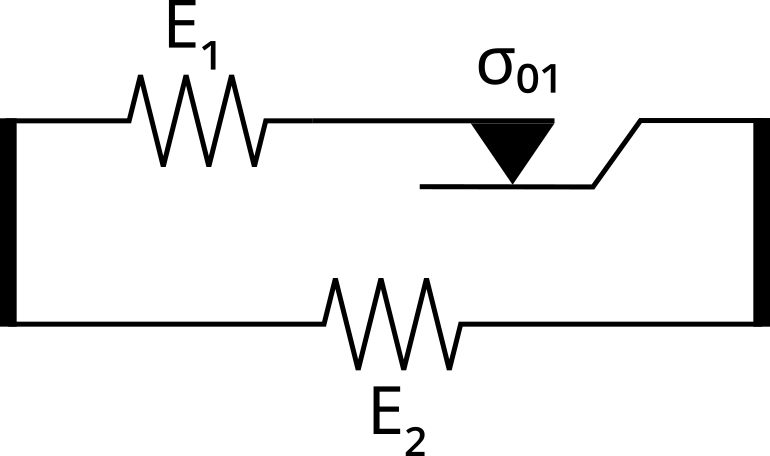

In [21]:
from IPython.display import display, Image
display(Image(filename="Plasticita_1D_Priklad_2_zadani.png", width=400))

Import potřebných knihoven

In [22]:
%matplotlib inline

import math
import numpy as np

from IPython.display import Markdown as md

import matplotlib.pyplot as plt


## Řešení

In [23]:
# Hodnoty vstupních parametrů dle zadání:
E1 = 20 * 1000 # MPa
E2 = 5 * 1000 # MPa
sigma01 = 100 # MPa
epsilon_max = 0.018
epsilon_min = 0.0

# Inicializace prázdných seznamů, kam v každém kroku uložíme hodnotu celkového napětí a celkové deformace modelu (pro vykreslení prac. diagramu)
strain_values = []  # Seznam pro celkové deformace
stress_values = []  # Seznam pro celkové napětí

Označení dílčích hodnot deformací a napětí:  
$σ_1$ ... napětí v horní větvi modelu (v obou sériově zapojených článcích je vždy stejné napětí)  
$ε_1el$ ... deformace pružiny o tuhosti $E_1$  
$ε_1pl$ ... deformace plastického článku s mezí kluzu $σ_{01}$  
$σ_2$ ... napětí v pružině s tuhostí $E_2$  
$ε_2$ ... deformace pružiny o tuhosti $E_2$

Celkové napětí $σ$ je v každém kroku rovno součtu napětí v jednotlivých větvích modelu $σ = σ_1 + σ_2$.

Pro přehlednost je u každého stavu vykresleno schéma modelu s uvedením konkrétních hodnot napětí a deformací ve všech částech modelu.

### A - počáteční (nulový) stav

In [24]:
# Na počátku jsou všechny hodnoty napětí a deformací rovny nule
sigma1 = 0
epsilon1el = 0
epsilon1pl = 0
sigma2 = 0
epsilon2 = 0

sigma_A = sigma1 + sigma2
epsilon_A = epsilon2

strain_values.append(epsilon_A)  # Uložení deformace
stress_values.append(sigma_A)  # Uložení napětí

print("\n")
print(f"sigma1 = {sigma1} MPa")
print(f"epsilon1el = {epsilon1el}")
print(f"epsilon1pl = {epsilon1pl}")
print(f"sigma2 = {sigma2} MPa")
print(f"epsilon2 = {epsilon2}")
print("\n")

print(f"Celkové napětí při počátku zatížení je: {sigma_A} MPa")
print(f"Celková deformace při počátku zatížení je: {epsilon_A}")



sigma1 = 0 MPa
epsilon1el = 0
epsilon1pl = 0
sigma2 = 0 MPa
epsilon2 = 0


Celkové napětí při počátku zatížení je: 0 MPa
Celková deformace při počátku zatížení je: 0


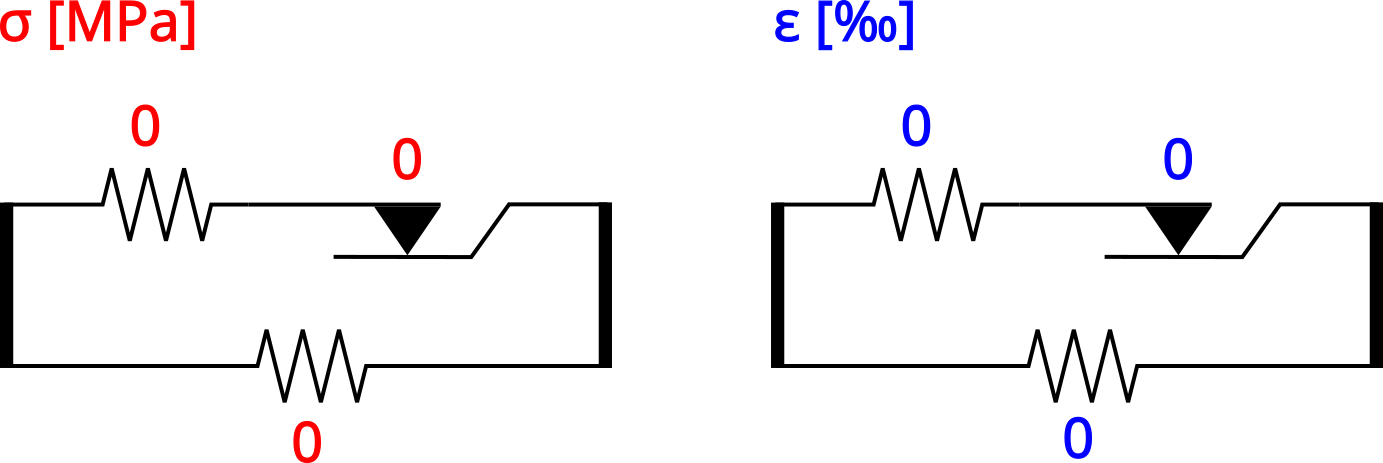

In [25]:
from IPython.display import display, Image
display(Image(filename="Plasticita_1D_Priklad_2_stav_A.png", width=500))

### B - dosažení mezního napětí v plastickém článku

In [26]:
# Výpočet hodnot napětí a deformací pro nový krok
sigma1 = sigma01
epsilon1el = sigma01 / E1
epsilon1pl = 0
epsilon2 = epsilon1el + epsilon1pl
sigma2 = epsilon2 * E2

sigma_B = sigma1 + sigma2
epsilon_B = epsilon2

strain_values.append(epsilon_B)  # Uložení deformace
stress_values.append(sigma_B)  # Uložení napětí

print("\n")
print(f"sigma1 = {sigma1} MPa")
print(f"epsilon1el = {epsilon1el}")
print(f"epsilon1pl = {epsilon1pl}")
print(f"sigma2 = {sigma2} MPa")
print(f"epsilon2 = {epsilon2}")
print("\n")

print(f"Celkové napětí při dosažení mezního napětí v plastickém článku je: {sigma_B} MPa")
print(f"Celková deformace při dosažení mezního napětí v plastickém článku je: {epsilon_B*1000} × 10⁻³")



sigma1 = 100 MPa
epsilon1el = 0.005
epsilon1pl = 0
sigma2 = 25.0 MPa
epsilon2 = 0.005


Celkové napětí při dosažení mezního napětí v plastickém článku je: 125.0 MPa
Celková deformace při dosažení mezního napětí v plastickém článku je: 5.0 × 10⁻³


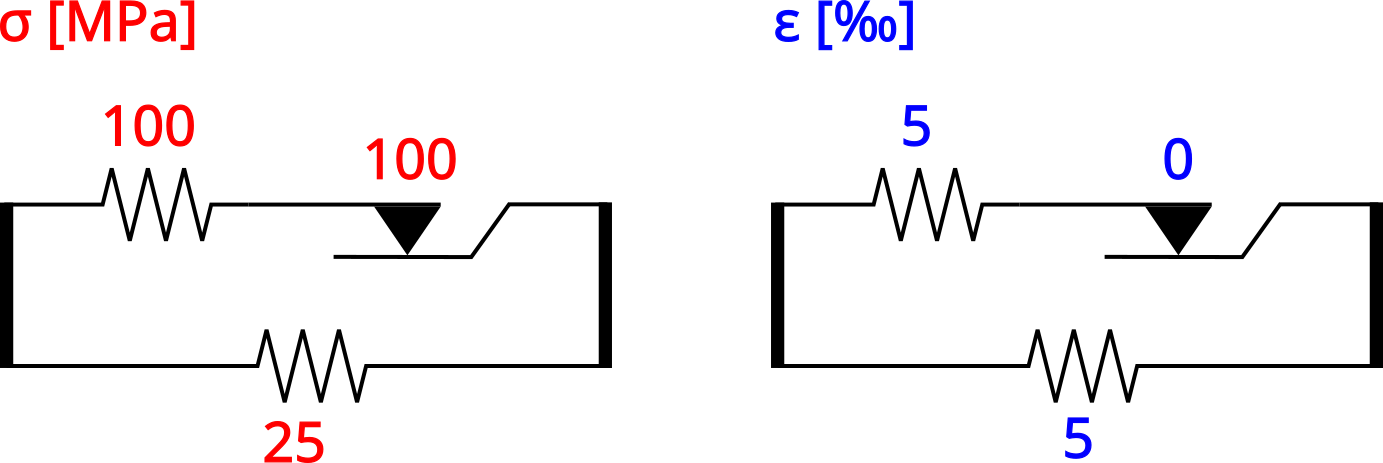

In [27]:
from IPython.display import display, Image
display(Image(filename="Plasticita_1D_Priklad_2_stav_B.png", width=500))

### C - dosažení předepsané maximální deformace

In [28]:
# Výpočet hodnot napětí a deformací pro nový krok
sigma1 = sigma01
epsilon1el = sigma01 / E1
epsilon1pl = epsilon_max - epsilon1el
epsilon2 = epsilon1el + epsilon1pl
sigma2 = epsilon2 * E2

sigma_C = sigma1 + sigma2
epsilon_C = epsilon2
epsilon_pl = epsilon1pl

strain_values.append(epsilon_C)  # Uložení deformace
stress_values.append(sigma_C)  # Uložení napětí

print("\n")
print(f"sigma1 = {sigma1} MPa")
print(f"epsilon1el = {epsilon1el} MPa")
print(f"epsilon1pl = {epsilon1pl:.3f} MPa")
print(f"sigma2 = {sigma2} MPa")
print(f"epsilon2 = {epsilon2}")
print("\n")

print(f"Celkové napětí při dosažení maximální předepsané deformace je: {sigma_C} MPa")
print(f"Dosaženo maximální předepsané deformace: {epsilon_C * 1000} × 10⁻³")
print(f"Hodnota plastické deformace v okamžiku dosažení maximální celkové deformace je: {epsilon_pl * 1000:.1f} × 10⁻³")



sigma1 = 100 MPa
epsilon1el = 0.005 MPa
epsilon1pl = 0.013 MPa
sigma2 = 90.0 MPa
epsilon2 = 0.018


Celkové napětí při dosažení maximální předepsané deformace je: 190.0 MPa
Dosaženo maximální předepsané deformace: 18.0 × 10⁻³
Hodnota plastické deformace v okamžiku dosažení maximální celkové deformace je: 13.0 × 10⁻³


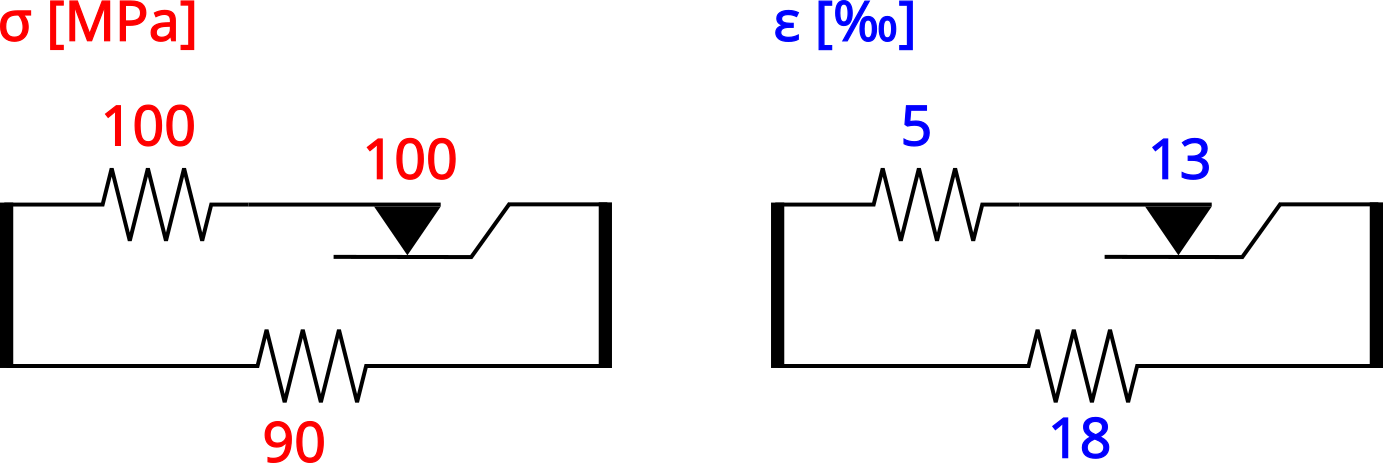

In [29]:
from IPython.display import display, Image
display(Image(filename="Plasticita_1D_Priklad_2_stav_C.png", width=500))

### D - dosažení mezního tlakového napětí v plastickém článku

In [30]:
# Výpočet hodnot napětí a deformací pro nový krok
sigma1 = -sigma01
epsilon1el = sigma1 / E1
epsilon1pl = epsilon1pl  # beze změny
epsilon2 = epsilon1el + epsilon1pl
sigma2 = epsilon2 * E2

sigma_D = sigma1 + sigma2
epsilon_D = epsilon2

strain_values.append(epsilon_D)  # Uložení deformace
stress_values.append(sigma_D)  # Uložení napětí

print("\n")
print(f"sigma1 = {sigma1} MPa")
print(f"epsilon1el = {epsilon1el}")
print(f"epsilon1pl = {epsilon1pl:.3f}")
print(f"sigma2 = {sigma2:.1f} MPa")
print(f"epsilon2 = {epsilon2:.3f}")
print("\n")

print(f"Celkové napětí při dosažení mezního tlakového napětí v plastickém článku je: {sigma_D:.1f} MPa")
print(f"Celková deformace při dosažení mezního tlakového napětí v plastickém článku je: {epsilon_D * 1000:.1f} × 10⁻³")



sigma1 = -100 MPa
epsilon1el = -0.005
epsilon1pl = 0.013
sigma2 = 40.0 MPa
epsilon2 = 0.008


Celkové napětí při dosažení mezního tlakového napětí v plastickém článku je: -60.0 MPa
Celková deformace při dosažení mezního tlakového napětí v plastickém článku je: 8.0 × 10⁻³


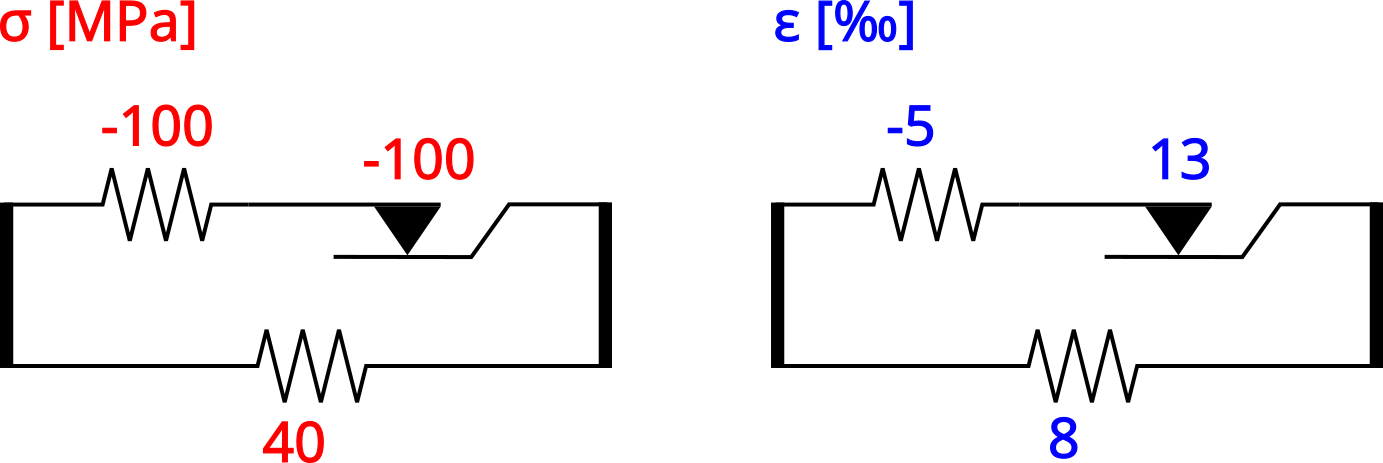

In [31]:
from IPython.display import display, Image
display(Image(filename="Plasticita_1D_Priklad_2_stav_D.png", width=500))

### E - dosažení celkové nulové deformace modelu


In [32]:
# Výpočet hodnot napětí a deformací pro nový krok
sigma1 = -sigma01
epsilon1el = sigma1 / E1
epsilon1pl = epsilon_min - epsilon1el
epsilon2 = epsilon1el + epsilon1pl
sigma2 = epsilon2 * E2

sigma_D = sigma1 + sigma2
epsilon_D = epsilon2

strain_values.append(epsilon_D)  # Uložení deformace
stress_values.append(sigma_D)  # Uložení napětí

print("\n")
print(f"sigma1 = {sigma1} MPa")
print(f"epsilon1el = {epsilon1el}")
print(f"epsilon1pl = {epsilon1pl:.3f}")
print(f"sigma2 = {sigma2:.1f} MPa")
print(f"epsilon2 = {epsilon2:.3f}")
print("\n")

print(f"Celkové napětí při dosažení celkové nulové deformace modelu je: {sigma_D:.1f} MPa")
print(f"Dosažení celkové nulové deformace modelu: {epsilon_D * 1000:.1f} × 10⁻³")



sigma1 = -100 MPa
epsilon1el = -0.005
epsilon1pl = 0.005
sigma2 = 0.0 MPa
epsilon2 = 0.000


Celkové napětí při dosažení celkové nulové deformace modelu je: -100.0 MPa
Dosažení celkové nulové deformace modelu: 0.0 × 10⁻³


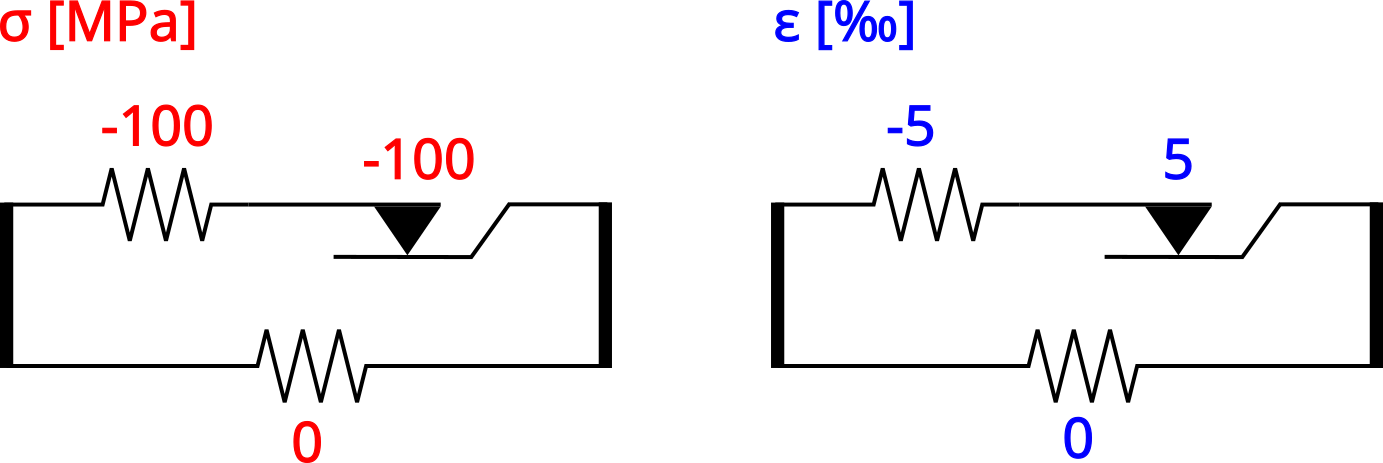

In [33]:
from IPython.display import display, Image
display(Image(filename="Plasticita_1D_Priklad_2_stav_E.png", width=500))

### Vykreslení pracovního diagramu

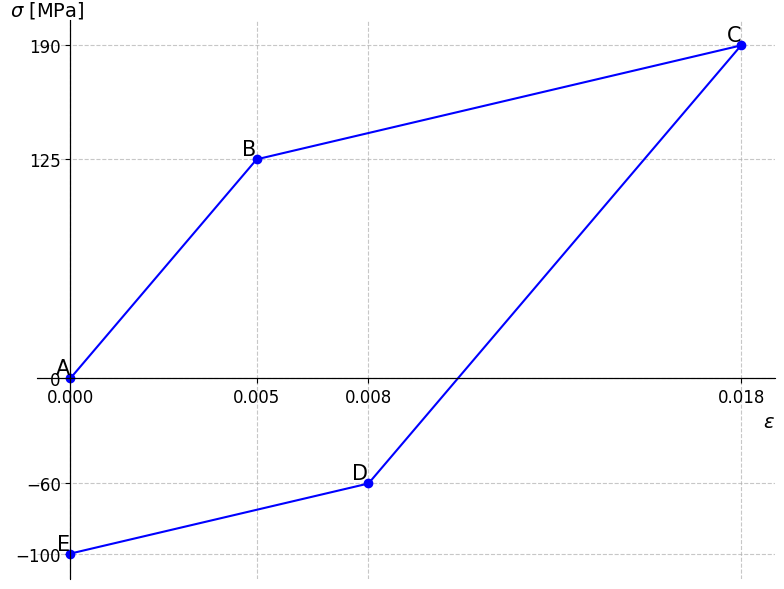

In [34]:
# Písmena odpovídající jednotlivým bodům
labels = ['A', 'B', 'C', 'D', 'E']

# Vykreslení pracovního diagramu
plt.figure(figsize=(8, 6))
plt.plot(strain_values, stress_values, '-o', color='blue')

# Přidání popisků k bodům
for x, y, label in zip(strain_values, stress_values, labels):
    plt.text(x, y, label, fontsize=15, ha='right', va='bottom', color='black')

# Nastavení os
plt.axhline(0, color='black', linewidth=0.8)  # Vodorovná osa
plt.axvline(0, color='black', linewidth=0.8)  # Svislá osa
plt.gca().spines['top'].set_visible(False)   # Skrytí horního rámečku
plt.gca().spines['right'].set_visible(False) # Skrytí pravého rámečku
plt.gca().spines['bottom'].set_position('zero') # Posunutí spodní osy na střed
plt.gca().spines['left'].set_position('zero')   # Posunutí levé osy na střed

# Přidání explicitních značek na osy
plt.xticks(sorted(set(strain_values)), fontsize=12)
plt.yticks(sorted(set(stress_values)), fontsize=12)

# Nastavení popisů os
plt.xlabel('$\\epsilon$', fontsize=14, loc='right')
plt.ylabel('$\\sigma$ [MPa]', fontsize=14, rotation=0, labelpad=-50, loc='top')

# Mřížka pro lepší přehlednost
plt.grid(True, linestyle='--', alpha=0.7)

# Zobrazení grafu
plt.tight_layout()
plt.show()